In [60]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns





# Data Exploration



In [61]:
df= pd.read_csv('prosperLoanData.csv')
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [62]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [63]:
# checking for missing data
missing_values_count =df.isnull().sum()
missing_values_count.to_csv('miss.csv',index=False)


# Performing Data Cleaning

In [64]:
df['TotalProsperLoans']=df['TotalProsperLoans'].fillna(0)
df['TotalProsperPaymentsBilled']=df['TotalProsperPaymentsBilled'].fillna(0)
df['OnTimeProsperPayments']=df['OnTimeProsperPayments'].fillna(0)
df['ProsperPaymentsLessThanOneMonthLate']=df['ProsperPaymentsLessThanOneMonthLate'].fillna(0)
df['ProsperPaymentsOneMonthPlusLate']=df['ProsperPaymentsOneMonthPlusLate'].fillna(0)
df['ProsperPrincipalBorrowed']=df['ProsperPrincipalBorrowed'].fillna(0)
df['ProsperPrincipalOutstanding']=df['ProsperPrincipalOutstanding'].fillna(0)
df['ScorexChangeAtTimeOfListing']=df['ScorexChangeAtTimeOfListing'].fillna(0)




df['Occupation']=df['Occupation'].fillna('No occupation')
df['ClosedDate']=df['ClosedDate'].fillna('NaN')
df['GroupKey']=df['GroupKey'].fillna('No_group')
df['DebtToIncomeRatio']=df['DebtToIncomeRatio'].fillna(df['DebtToIncomeRatio'].mean())
df['LoanFirstDefaultedCycleNumber']=df['LoanFirstDefaultedCycleNumber'].fillna('Not charged off')




In [65]:
df.dropna(subset = ["EmploymentStatusDuration"], inplace=True)
df.dropna(subset = ["CurrentCreditLines"], inplace=True)



In [66]:

missing_values_count.to_csv('miss.csv',index=False)

# Data Visualization


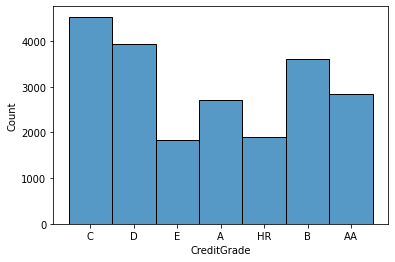

In [67]:
sns.histplot(data=df['CreditGrade'])
plt.show()

# the most number of borrower credit grade is C

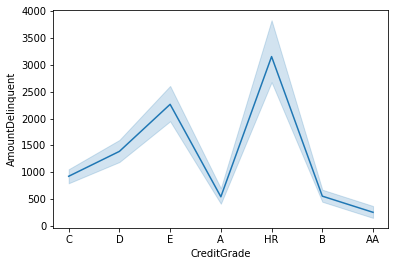

In [68]:
sns.lineplot(x=df['CreditGrade'], y=df['AmountDelinquent'])
plt.show()

# C and D lead to 1000 and 1500 of deliquency so its high value of deliquency

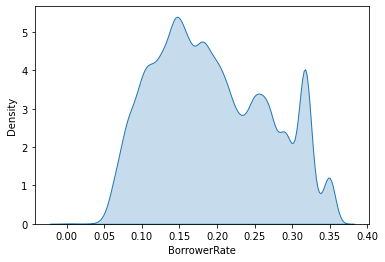

In [69]:
sns.kdeplot(data=df['BorrowerRate'], shade=True)
plt.show()

# it is between 0.1 and 0.2

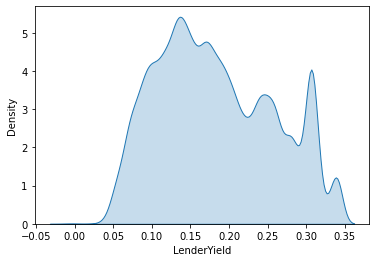

In [70]:
sns.kdeplot(data=df['LenderYield'], shade=True)
plt.show()

# yes highest number of lender yield is between 0.1 and 0.2

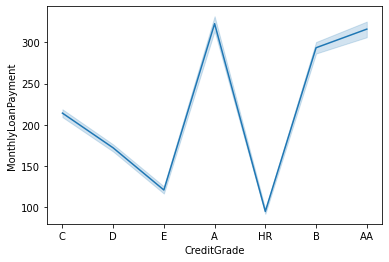

In [71]:
sns.lineplot(x=df['CreditGrade'], y=df['MonthlyLoanPayment'])
plt.show()

# credit is accurate since higher credit grades leads to higher monthly loan payment

0         Completed
11        Completed
15        Defaulted
21        Completed
23        Defaulted
            ...    
113923    Completed
113927    Completed
113928    Completed
113929    Completed
113935    Completed
Name: LoanStatus, Length: 36837, dtype: object


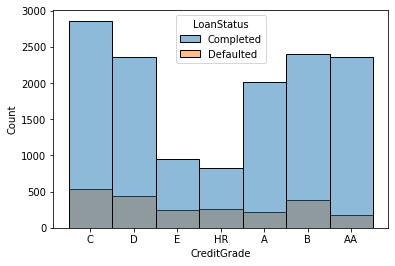

In [72]:
default = df.loc[(df.LoanStatus == 'Completed') | (df.LoanStatus == 'Defaulted')]

G=default.index
print(df.LoanStatus[G])
sns.histplot(x=df.CreditGrade[G], hue=df.LoanStatus[G])
plt.show()

# credit grade is accurate since high credit grade leads to  more number of completed loan status

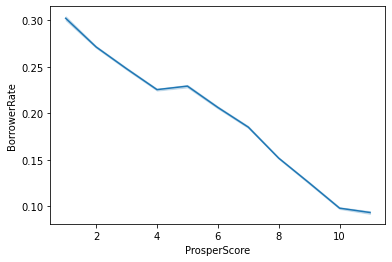

In [78]:
sns.lineplot(x=df['ProsperScore'], y=df['BorrowerRate'])
plt.show()


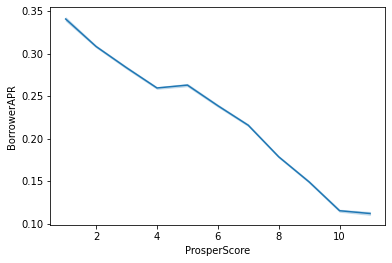

In [79]:
sns.lineplot(x=df['ProsperScore'], y=df['BorrowerAPR'])
plt.show()

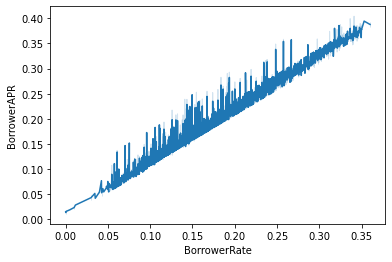

# 

# from the plots as prosper score increase leads to decrease in both borrower rate and borrower apr